Optimisation Techniques
-----------------------

In this notebook, I experminted several Optimization techniques to deal the several challenges

Characterizing the error function

1. The problem of local minima

2. The importance of initialization

3. The problem of poor conditioning

4. Characterizing conditioning with the Hessian

In [24]:
import torch 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(0)
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset


In [6]:
if torch.backends.mps.is_available():
    device = torch.device("mps")

elif torch.cuda.is_available():
    device = torch.device("cuda")

else:
    device = torch.device("cpu")

print(device)

mps


### Experimenting with simple dataset: y = 2x + noise

`torch.*_like()` methods to keep same shape - that is, having the same number of dimensions and the same number of cells in each dimension when we perform operations on one or two tensors.

`torch.unsqueeze(input, dim) → Tensor`Returns a new tensor with a dimension of size one inserted at the specified position. The returned tensor shares the same underlying data with this tensor.

In [2]:
x = torch.linspace(-2, 2, 100).unsqueeze(1)
y = 2 * x + 0.3 * torch.randn_like(x)

### Defining one layer Linear model 

In [14]:
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1, bias = True)
    def forward(self, x):
        return self.linear(x)


### Defining a Two layer Linear Model

In [10]:
class TwoLayerLinear(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 1)
    def forward(self, x):
        a = self.fc1(x)
        return self.fc2(a)

### Defining a two layer non linear model

In [20]:
class TwoLayerNonLinear(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 10)
        self.act = nn.Tanh()
        self.fc2 = nn.Linear(10, 1)
    def forward(self, x):
        return self.fc2(self.act(self.fc1(x)))

### Model Training 

In [8]:
def train(model, lr = 0.05, epochs = 2000):
    optimizer = optim.SGD(model.parameters(), lr = lr)
    criterion = nn.MSELoss()
    losses = []
    for _ in range(epochs):
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses 



/var/folders/85/k6n4vd4179v0s7gvq1lm7jgw0000gn/T/ipykernel_17503/2346697540.py:6: MatplotlibDeprecationWarning: Passing label as a length 3 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(losses, label = labels)


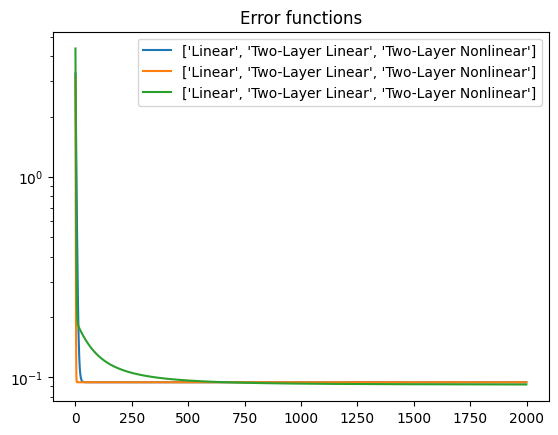

In [23]:
models = [LinearModel(), TwoLayerLinear(), TwoLayerNonLinear()]
labels = ['Linear', 'Two-Layer Linear', 'Two-Layer Nonlinear']

for model, label in zip(models, labels):
    losses = train(model, lr = 0.05)
    plt.plot(losses, label = labels)

plt.yscale('log')
plt.legend()
plt.title("Error functions")
plt.show()